# Halloween Candy Data Visualizations!

All data science endeavors begin with an analysis of supporting data to understand trends, correlations, and more in the effort to glean insights not particularly obvious at a surface level. Additionally, we as humans find it easier to grasp what the data has to say in the form of visualizations, so it is very common for data scientists and other data practitioners to create a variety of data visualizations to better "tell the story" of what the data represents.

In this notebook, I'll teach you how to perform a variety of data visualizations using a Halloween candy dataset. This dataset was curated by the prominent statistics group FiveThirtyEight and housed on Kaggle at this link: [The Ultimate Halloween Candy Power Ranking](https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking). For specifics on the features associated with that dataset, I would advise you check out that link as they do a great job explaining the details of each feature.

## Project Setup
In this brief section, we'll import the proper libraries and also load the Halloween candy dataset from a CSV file as a **Pandas DataFrame**. The primary Python libraries we will be using for the data visualizations include **Matplotlib** and **Seaborn**. Notice in the next cell that there is a command beginning with a percentage (`%`) sign. Jupyter offers these special bits of exclusive functionality for notebooks called **magic commands**. This particular magic command allows us to view our visualizations appropriately!

In [1]:
# Importing the required third party Python libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Enabling the Jupyter "magic command" to get matplotlib visualizations working correctly
%matplotlib inline

In [2]:
# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the Halloween candy dataset as a Pandas DataFrame
df_candy = pd.read_csv('../data/candy-data.csv')

In [4]:
# Viewing the first view rows of the Halloween candy DataFrame
df_candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


## Halloween Colors
Because this is a notebook all about Halloween candy visualizations, I thought it would be fun to have all the visualizations include Halloween colors. I personally like to do some light graphic design on the side, and graphic designers are very inclined to use **hex values** when selecting colors. Hex values allow a graphic designer to hone in on a very specific set of colors, and there are many websites across the internet that have assembled pre-packaged **color palettes** with colors that work well together to promote a specific theme. Through [this website here](https://www.color-hex.com/color-palette/3399), we will be using thie Halloween color palette shown below. In the next cell, I will create a Python dictionary of these respective hex values that we can use for our respective visualizations.


<img src="../images/halloween-colors.png" width="500" height="500" align="center"/>

In [5]:
# Setting a dictionary with Halloween color hex values
halloween_colors = {
    'orange': '#FF9A00',
    'purple': '#C900FF',
    'green': '#09FF00',
    'off-white': '#FBFAF4',
    'black': '#000000'
}

# Setting the Seaborn color palette with the colors defined above
sb.set_palette(sb.color_palette(list(halloween_colors.values())))

# Setting the Seaborn style to have a dark(ish) background with grid lines
sb.set_style('darkgrid')

## Categorical Visualizations
When I selected this dataset, I transparently did not pay that close of attention to the nature of the data, particularly given that there are a LOT of features with binary values. No matter! This can give us some nice practice into displaying these categorical variables across the visualizations below.

### Count Plot
Just as the name sounds, a **count plot** is a visualization that counts the number of a specific value. Seaborn's `countplot` functionality is relatively simple, so I thought I'd shake things up a bit by showing you how to display multiple count plots in a singular, holistic, visualizations.

**Example**: We have a whole bunch of these binary features, nine to be precise. These binary features are represented by a 0 for "no" and 1 for "yes". *Wouldn't it be interesting to see how all these binary variables compare in a single, easy-to-read visualization?* We're going to have to do a tiny bit of data preprocessing first, but then we'll analyze our findings as part of a single visual with these 9 count plots.

In [6]:
# Selecting just the columns containing binary variables
df_binary = df_candy.select_dtypes(int)

In [7]:
# Altering the binary variables from a respective 0 and 1 integer to respective 'no' and 'yes' string values
df_binary.mask(df_binary == 0, 'no', inplace = True)
df_binary.mask(df_binary == 1, 'yes', inplace = True)

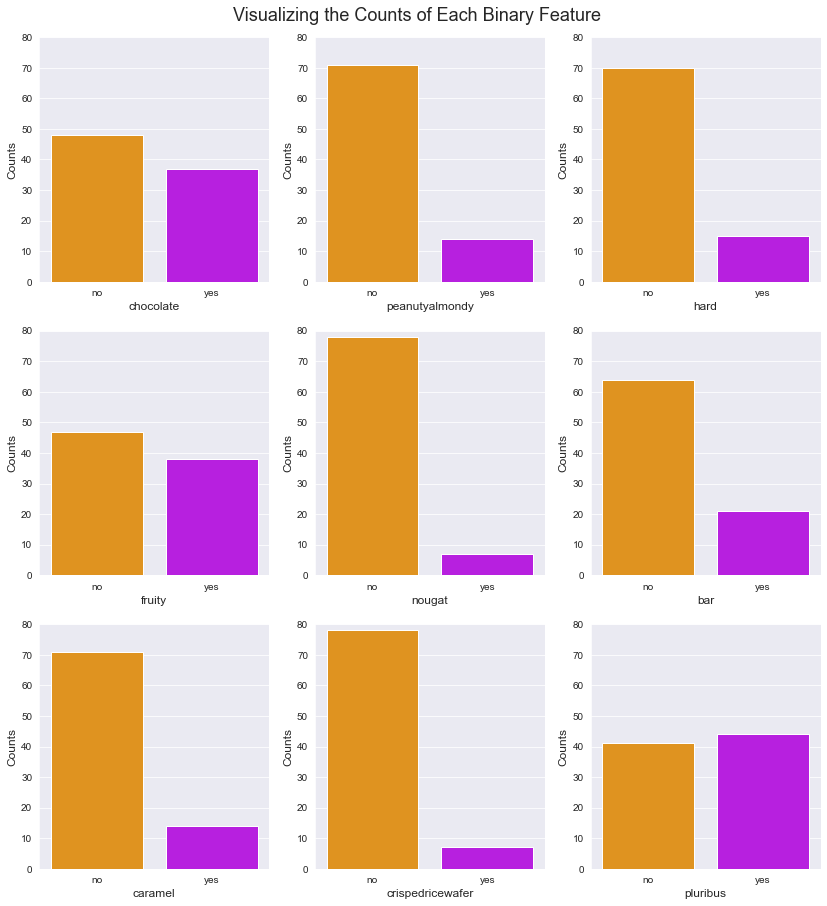

In [8]:
# Establishing a 3x3 grid to place all our countplots
figure, axes = plt.subplots(3, 3, figsize = (14, 14))

# Establishing x- and y-coordinate values
x_coord, y_coord = 0, 0

# Displaying all countplots for each variable appropriately
for feature in df_binary.columns:
    
    # Displaying the countplot for the respective feature
    plot = sb.countplot(x = df_binary[feature], order = ['no', 'yes'], ax = axes[x_coord, y_coord]);
    
    # Adjusting the y-value limit
    plot.set_ylim(0, 80)
    
    # Setting the x- and y-label name and font-size
    plot.set_ylabel('Counts', fontsize = 12)
    plot.set_xlabel(feature, fontsize = 12)
    
    # Incrementing the coordinate values
    x_coord += 1
    if x_coord == 3:
        y_coord += 1
        x_coord = 0
        
# Adding title to the holistic visualization
figure.suptitle('Visualizing the Counts of Each Binary Feature', fontsize = 18);
figure.subplots_adjust(top = .95)

**Analysis**: Well, if I'm being completely honest, this visualization isn't super informative. 😂 I suppose it's interesting that fruity candy vs. chocolate candy seems to have some sort of correlation, which would make sense in the fact that I can't think of any candy that is necessarily fruity and chocolatey. It's also interestingt to note that pluribus is the only category that more candies have than not. I had to go remind myself what pluribus means in this context. For context, pluribus means if a candy is essentially multiples in a box or one holistic thing. That said, a pluribus-positive candy would be like M&Ms whereas a pluribus-negative candy would be like a Snickers candy bar. So even though we didn't get a whole lot of value out of this particular visualization, I hope you can find the value in visualizing multiple count plots like this!

## Distribution Visualizations
While most of this dataset consists of binary features, there are a handful of features with continuous values. Naturally, it is super common for data scientists to want to understand the distribution of these sorts of features, so this section will cover a few types of distribution visualizations.

### Box Plot / Violin Plot
A **box plot** is a visualization used to understand at a high level the primary quantiles of a feature. More specifically, it will highlight the median, interquartile range (IQR), and the outlying minimum and maximum values. The IQR is represented by the center box whereas the "whiskers" on either side of the box represent the outlying minimum and maximum values. A **violin plot** is similiar to the box plot, except it seeks to provide more of a visualization on the precise distribution of the data. Depending on what you precisely want to know about the data, you may choose one over the other. Or you could do what we're about to do and show both side by side!

**Example**: We have three different features with percentage-based data: sugar percentile, price percentile, and the percentile of how often each candy won when matched up against another candy. The question we're essentially looking to answer for each of these is, *is there a wide distribution in the data, or did they all fare about the same for reach respective feature?* Let's find out!

In [18]:
# Extracting the features with percentage-based data
df_percentile = df_candy.select_dtypes(float)

In [34]:
# Converting percentages for the 'winpercent' feature into pure decimal values
df_percentile['winpercent'] = df_percentile['winpercent'].div(100)

In [58]:
# Creating a map to rename the features
percentile_renaming_map = {
    'sugarpercent': 'Sugar Percentile',
    'pricepercent': 'Price Percentile',
    'winpercent': 'Win Percentile'
}

# Renaming the columns for df_percentile
df_percentile.rename(columns = percentile_renaming_map, inplace = True)

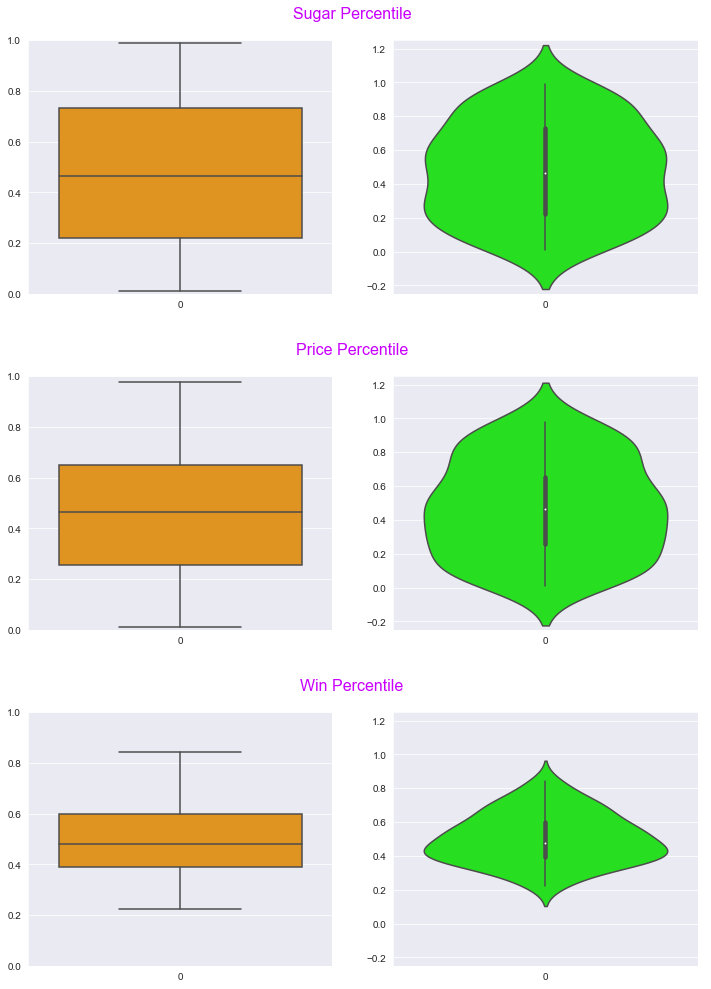

In [94]:
# Getting each of the column names from the percentile DataFrame
percentage_columns = list(df_percentile.columns)

# Establishing the high level figure
holistic_figure = plt.figure(figsize = (12, 14))
plt.title('Analyzing the Distribution of Percentile-Based Features')

# Creating subfigures for each respective feature
subfigures = holistic_figure.subfigures(3, 1)
for row, subfigure in enumerate(subfigures):
    
    # Getting the feature from percentage_columns
    feature = percentage_columns.pop(0)
    
    # Setting the title for each row appropriately
    subfigure.suptitle(f'{feature}', fontsize = 16, color = halloween_colors['purple'])

    # Creating the subplots for each subfigure
    axes = subfigure.subplots(1, 2)
    
    # Iterating through the columns and axes of each subfigure
    for col, ax in enumerate(axes):
        
        # Creating the appropriate visualization per the correct column
        if col == 0:
            
            # Creating the box plot visualization
            boxplot = sb.boxplot(data = df_percentile[feature], ax = ax, color = halloween_colors['orange']);
            
            # Adjusting the y-value limit for the box plots
            boxplot.set_ylim(0, 1)
            
        elif col == 1:
            
            # Creating the violin plot visualization
            violinplot = sb.violinplot(data = df_percentile[feature], ax = ax, color = halloween_colors['green']);

            # Adjusting the y-value limit for the box plots
            violinplot.set_ylim(-.25, 1.25)            

## Relational Visualizations

When starting off work in a new realm of data, one of the first things a data scientist looks for is **correlations between various data features**. In this section, we're going to cover a number of these correlation visualizations and how we can build an intuition for how these sorts of visualizations better tell a story about the data!

### Scatter / Regression Plot (`lmplot`)
A **regression plot** is a kind of visualization that generally compares two numerical variables between an x- and y-axis with each data point represented by a dot. We can also enhance a regression plot with an additional **hue** variable that visually dictates how this third variable affects the two initial variables we are comparing. In our example below, we are specifically going to use Seaborn's `lmplot` functionality, which essentially combines a standard regression plot with that ability to add that hue for a deeper analysis on the data. (By the way, I have no idea why it's called `lmplot`. 😅)

**Example:** Our `sugarpercent` variable tells us the percentile of sugar a particular candy has compared to the other candies, while the `pricepercent` variable tells us the percentile of price that a candy costs compared to the other candies. We also have a third variable, `chocolate`, tells us whether or not the candy is chocolate. A scatter plot can help us answer the question, *Do chocolate candies have a stronger and/or higher correlation of sugar-to-price than their non-chocalate bretherin?*

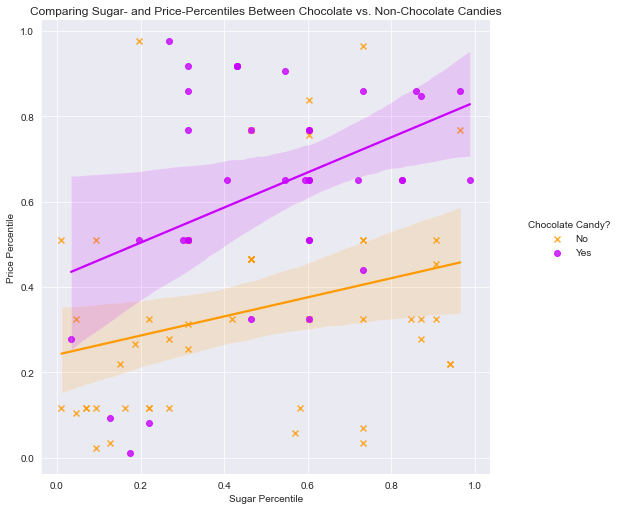

In [9]:
# Creating a scatter plot with Seaborn comparing the price- and sugar-percentiles between chocolate and non-chocolate candies
regressionplot = sb.lmplot(data = df_candy, x = 'sugarpercent', y = 'pricepercent', 
                           hue = 'chocolate', markers = ['x', 'o'], height = 7);

# Adjusting the axes, title, and more of the visualization
plt.title('Comparing Sugar- and Price-Percentiles Between Chocolate vs. Non-Chocolate Candies')
regressionplot.set_xlabels('Sugar Percentile')
regressionplot.set_ylabels('Price Percentile')
regressionplot.legend.set_title('Chocolate Candy?')
new_legend_labels = ['No', 'Yes']
for text, label in zip(regressionplot._legend.texts, new_legend_labels):
    text.set_text(label)
sb.move_legend(regressionplot, loc = 'upper left', bbox_to_anchor = (.95, .6))
plt.show()

**Analysis**: This visualization offers us a lot of information in one little plot! For both chocolate and non-chocolate candies, there is a very slight positive correlation in sugar percentile to price percentile, but there is so little data in this dataset that I would be very leery to make a broad-sweeping generalization like that. On the flip side, it appears to be pretty clear that chocolate candy has a higher sugar percentage AND higher price. This isn't super surprising since in my anecdotal experience, chocalate candy does seem to be higher in price than non-chocolate candy. There is more information we could glean from this plot, but I hope the primary takeaway is that you can see how much information you can squeeze out of one plot!

## Clustering Visualizations
In this next section, we'll use some unsupervised clustering to cluster the data into groups that the algorithm feels fit appropriately together. Next, we'll create some visualizations to help us intuit why the clustering algorithm clustered the data as it did.